# Figure and Subplots

The usual imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Usually need one figure and at least one axes.

### Formerly common pattern:

- create a figure
- add one or more axes in the correct places

### Nowadays:

- For any rectangular `NxM` grid of axes simply use `plt.subplots(N, M)`

<div class="alert alert-danger">
    <b>Outdated:</b>
</div>

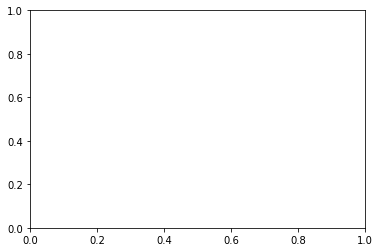

In [4]:
# outdated
plt.subplot(111)

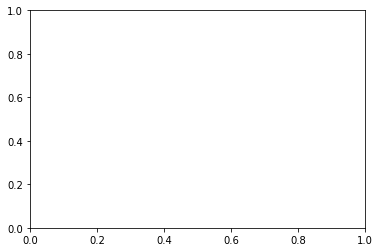

In [3]:
# outdated
fig = plt.figure()
ax = fig.add_subplot(111)

<div class="alert alert-success">
    <b>Use instead:</b>
</div>

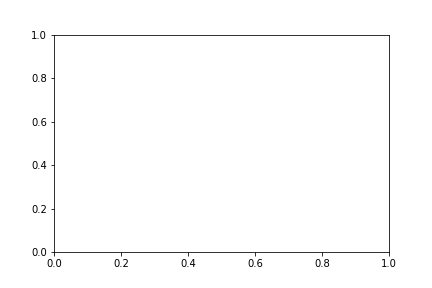

In [21]:
# use instead
fig, ax = plt.subplots()

<div class="alert alert-danger">
    <b>Outdated:</b>
</div>

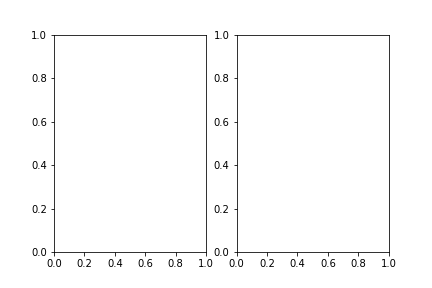

In [19]:
# outdated
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

<div class="alert alert-success">
    <b>Use instead:</b>
</div>

<class 'numpy.ndarray'> (2,)


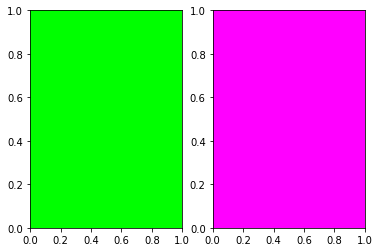

In [5]:
fig, axs = plt.subplots(1, 2)
print(type(axs), axs.shape)
axs[0].set_facecolor('lime')
axs[1].set_facecolor('fuchsia')

The return value of `plt.subplots` is a (squeezed) numpy array.

<class 'numpy.ndarray'> (2, 2)


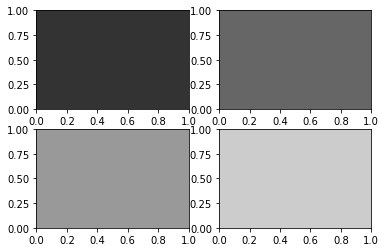

In [6]:
fig, axs = plt.subplots(2, 2)
print(type(axs), axs.shape)
axs[0, 0].set_facecolor('0.2')
axs[0, 1].set_facecolor('0.4')
axs[1, 0].set_facecolor('0.6')
axs[1, 1].set_facecolor('0.8')

By default, size-1 dimensions of the axes array are squeezed out.

<div class="alert alert-info">
    <b>Tip:</b> Tuple unpacking
</div>

Tuple unpacking can be used to assign the returned axes to single variables. Common patterns:

In [ ]:
fig, ax = plt.subplots()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

In [ ]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)

<div class="alert alert-info">
    <b>Tip:</b> Using axs.flat
</div>

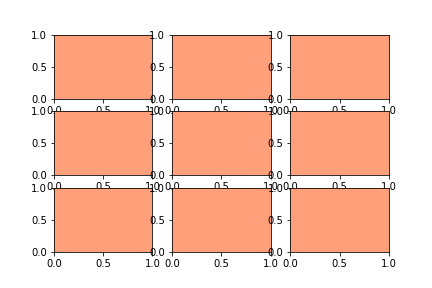

In [31]:
fig, axs = plt.subplots(3, 3)
for ax in axs.flat:
    ax.set_facecolor('lightsalmon')

`plt.subplots(N, M)` suits your needs when all created axes are on a regular grid and should have the same size.

For more complicated layouts use [GridSpec](`https://matplotlib.org/tutorials/intermediate/gridspec.html), or manually place an axes at desired positions using [Figure.add_axes](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes).

# Figure size

`figsize = (width, height)` determines the dimensions of the figure in inches.

Default size: [6. 4.]


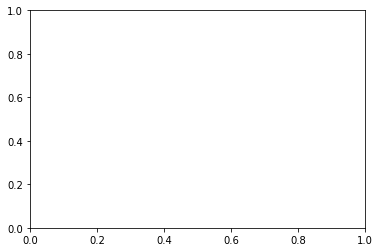

In [6]:
fig, ax = plt.subplots()
print('Default size:', fig.get_size_inches())

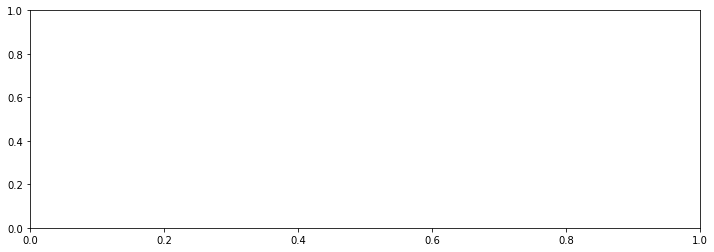

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))

### Excusion: Exact figure size

For pixel-based backends `figsize * dpi` is the actual size in pixels.

Let's make the figure the pysically correct size on the screen.

In [8]:
resolution = 1920, 1080  # pixels
diagonal = 13.3  # inches

import numpy as np
rx, ry = resolution
dpi = np.sqrt(rx**2 + ry**2) / diagonal
print(dpi)

165.6321180513006


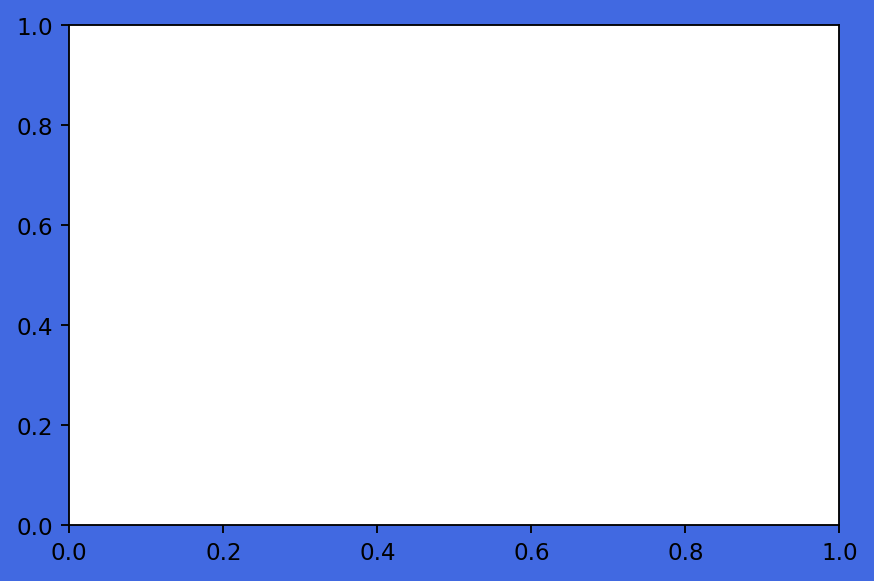

In [9]:
fig, ax = plt.subplots(dpi=dpi, facecolor='royalblue')

Still does not match for the inline backend. :(

The inline backend is trying to be smart and cuts of unused space around the axes ('tight' layout). Let's deactivate that:

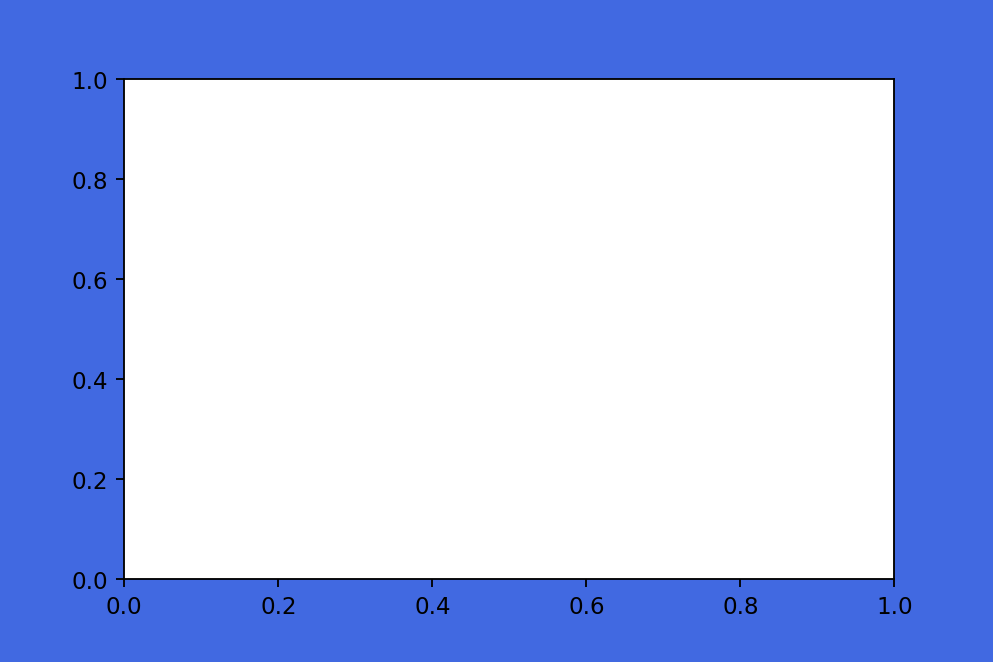

In [10]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

fig, ax = plt.subplots(dpi=dpi, facecolor='royalblue')

In [11]:
# reactivate the tight layouting
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

### General recommendation on figure size:

<div class="alert alert-info">
    <b>Tip:</b> Use dpi=100, do not bother with actual figure size.
</div>

Usually it's not worth adjusting the `dpi` to get a physically correct size on the screen, because different screens have different `dpi` and you don't want your plot to be screen depended.

When working with pixel based output (i.e. not svg or pdf), use a fixed `dpi=100` and scale `figsize` as needed. Rule:

   `figsize * dpi = pixels` i.e. `figsize = (6, 4) --> 600x400 pixels`

*Note*: The default is `dpi=100` in matplotlib (since version 2.0). The inline backend still overrides this default with `dpi=72` so that figures in the notebook are smaller by default.

### `figsize` and fonts

Font sizes are in points. They are not affected by `figsize`.

Text(0.2, 0.5, 'figsize=(8, 4)')

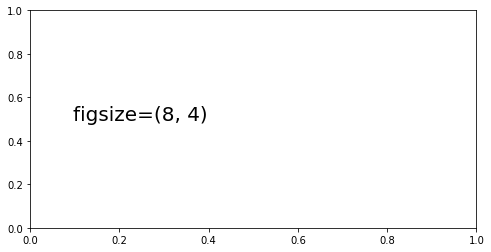

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.text(0.2, 0.5, 'figsize=(8, 4)', fontsize=20)

Text(0.2, 0.5, 'figsize=(8, 4)')

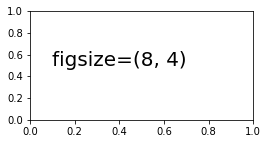

In [13]:
fig, ax = plt.subplots(figsize=(4, 2))
fig.text(0.2, 0.5, 'figsize=(8, 4)', fontsize=20)

## Layouting: Constrained Layout


Text(0, 0.5, 'The y label')

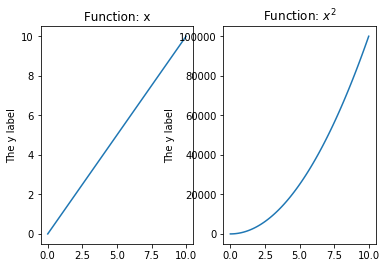

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, x)
ax2.plot(x, 1000*x**2)
ax1.set_title('Function: x')
ax2.set_title('Function: $x^2$')
ax1.set_ylabel('The y label')
ax2.set_ylabel('The y label')

Layouting a figure is hard: Need to size and position elements such that they don't overlap.

Matplotlib used to have a simple layouter (`plt.tight_layout()` or `fig.tight_layout()`).

### New since Matplotlib 3.0: Constrained Layout

Text(0, 0.5, 'The y label')

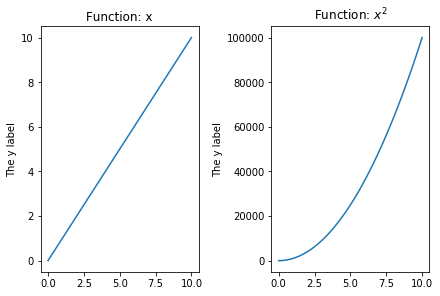

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
ax1.plot(x, x)
ax2.plot(x, 1000*x**2)
ax1.set_title('Function: x')
ax2.set_title('Function: $x^2$')
ax1.set_ylabel('The y label')
ax2.set_ylabel('The y label')